In [54]:
import pandas as pd
df_index=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/refs/heads/main/3-Complete%20Linear%20Regression/Practicals/economic_index.csv')

In [55]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [56]:
import numpy as np
import matplotlib.pyplot as plt

#drop unnecessary columns

df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [57]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

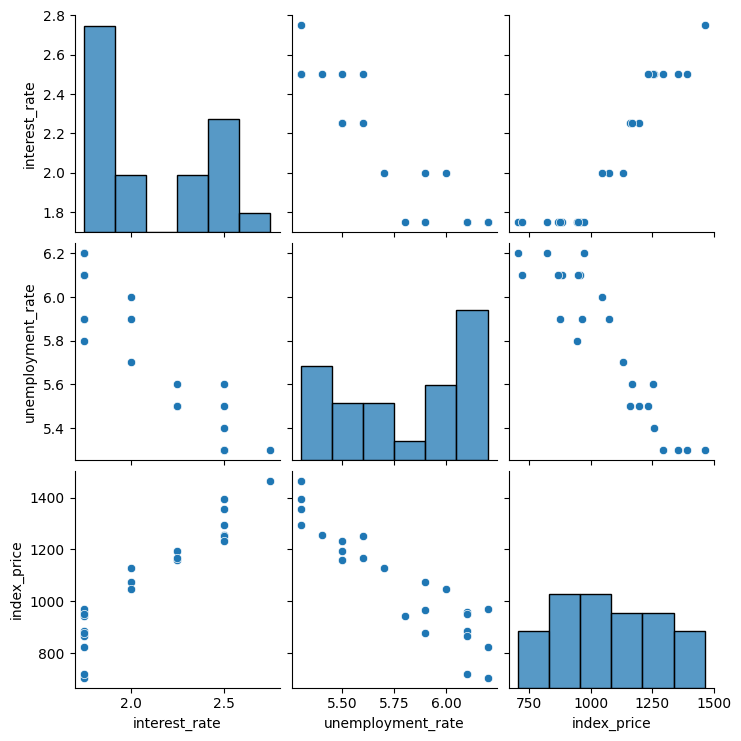

In [58]:
import seaborn as sns
sns.pairplot(df_index)

In [59]:
hm=df_index.corr()

<Axes: >

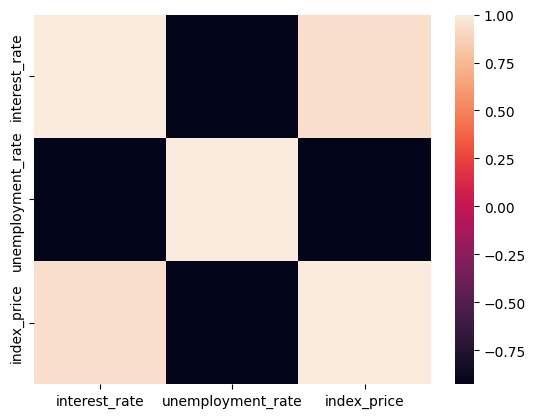

In [60]:
sns.heatmap(hm)

Text(0, 0.5, 'unemployment rate')

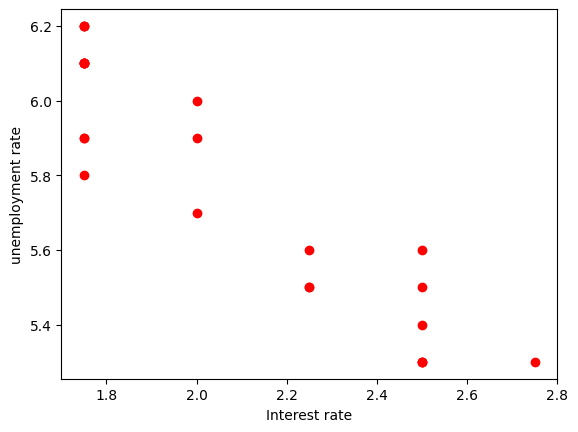

In [61]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')

In [62]:
# X=df_index[['interest_rate','unemployment rate']] # this is one way

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1] 

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

<Axes: xlabel='interest_rate', ylabel='index_price'>

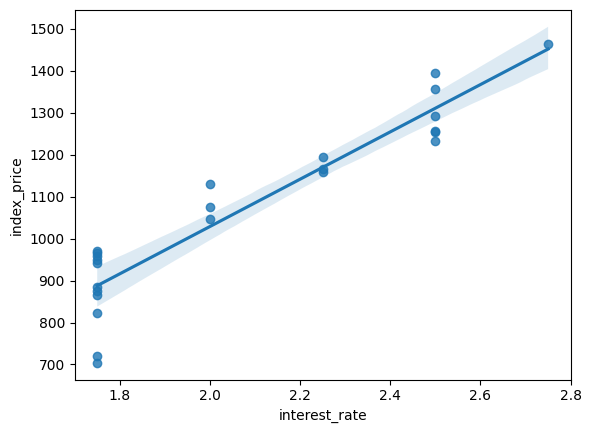

In [64]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [69]:
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
val_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                            cv=3)

In [74]:
val_score
avg_val_score = np.mean(val_score)
print(avg_val_score)

-5914.828180162388


In [75]:
#prediction 

y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
mse = print(mean_squared_error(y_test,y_pred))
mae = print(mean_absolute_error(y_test,y_pred))
import numpy as np
rmse = print(np.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)

print(score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

5793.762887712569
59.935781523235484
76.11677139574805
0.8278978091457145
0.7131630152428576


In [91]:
# Assumptions

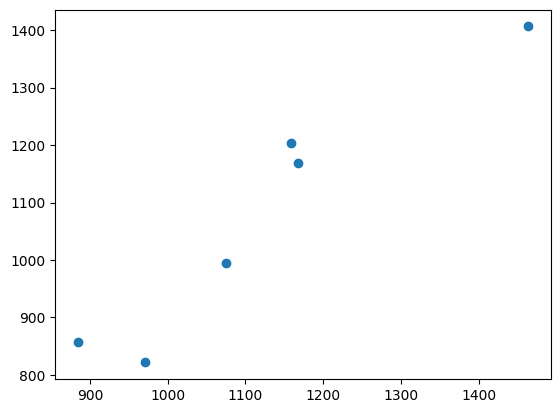

In [93]:
plt.scatter(y_test,y_pred)

In [94]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


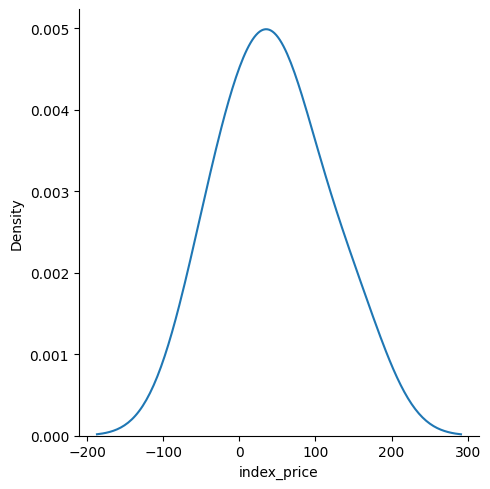

In [96]:
sns.displot(residuals,kind='kde')

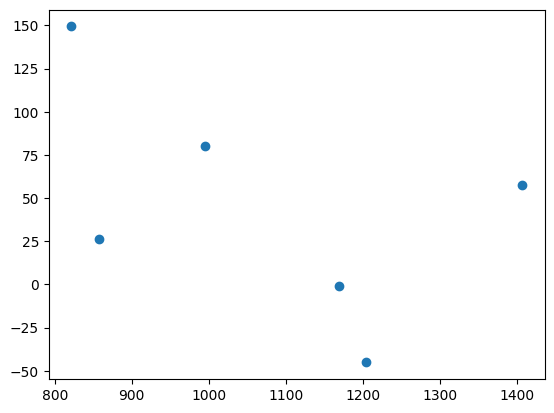

In [97]:
## let us create a scatter plot wrt pred and residuals

plt.scatter(y_pred,residuals)

In [99]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [100]:
model.summary()

d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 03 Jan 2025   Prob (F-statistic):                       0.754
Time:                        19:45:44   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
regression.coef_

array([  88.27275507, -116.25716066])